In [8]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\15521\Desktop\Deep Learning\HW2\RNN\HistoricalPrices.csv")

In [3]:
df

,Date,Open,High,Low,Close
0,1/2/1985,165.37,167.12,165.25,165.37
1,1/3/1985,164.57,166.07,164.44,164.57
2,1/4/1985,163.68,164.56,163.43,163.68
3,1/7/1985,164.24,164.62,163.74,164.24
4,1/8/1985,163.99,164.49,163.99,163.99
5,1/9/1985,165.18,165.56,164.06,165.18
6,1/10/1985,168.31,168.31,165.06,168.31
7,1/11/1985,167.91,168.66,167.66,167.91
8,1/14/1985,170.51,170.51,167.64,170.51
9,1/15/1985,170.81,171.81,170.44,170.81


In [4]:
training_set = df.iloc[:7817, 1:2].values
test_set = df.iloc[7817:, 1:2].values

In [28]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 7817):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(7757, 60, 1)


In [27]:
X_train

array([[[ 165.37],
        [ 164.57],
        [ 163.68],
        ...,
        [ 177.97],
        [ 178.43],
        [ 179.54]],

       [[ 164.57],
        [ 163.68],
        [ 164.24],
        ...,
        [ 178.43],
        [ 179.54],
        [ 179.54]],

       [[ 163.68],
        [ 164.24],
        [ 163.99],
        ...,
        [ 179.54],
        [ 179.54],
        [ 180.66]],

       ...,

       [[1954.33],
        [1986.63],
        [1982.34],
        ...,
        [2063.52],
        [2057.77],
        [2060.54]],

       [[1986.63],
        [1982.34],
        [1994.01],
        ...,
        [2057.77],
        [2060.54],
        [2077.34]],

       [[1982.34],
        [1994.01],
        [2013.73],
        ...,
        [2060.54],
        [2077.34],
        [2060.59]]])

In [49]:
#Build RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50))
rnn_model.add(Dropout(0.2))

#Output layer
rnn_model.add(Dense(units = 1))

rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fit the RNN to the Training set
rnn_model.fit(X_train, y_train, epochs = 100, batch_size = 60)

Epoch 1/100
130/130 [==============================] - 5s 15ms/step - loss: 0.3148
Epoch 2/100
130/130 [==============================] - 2s 15ms/step - loss: 0.0671
Epoch 3/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0301
Epoch 4/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0198
Epoch 5/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0131
Epoch 6/100
130/130 [==============================] - 2s 15ms/step - loss: 0.0104
Epoch 7/100
130/130 [==============================] - 2s 15ms/step - loss: 0.0083
Epoch 8/100
130/130 [==============================] - 2s 15ms/step - loss: 0.0060: 0s - loss: 0.00
Epoch 9/100
130/130 [==============================] - 2s 15ms/step - loss: 0.0051
Epoch 10/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0044
Epoch 11/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0038
Epoch 12/100
130/130 [==============================] - 2s 15ms/step

130/130 [==============================] - 2s 17ms/step - loss: 8.0735e-04
Epoch 96/100
130/130 [==============================] - 2s 17ms/step - loss: 7.8780e-04
Epoch 97/100
130/130 [==============================] - 2s 17ms/step - loss: 6.9749e-04
Epoch 98/100
130/130 [==============================] - 2s 17ms/step - loss: 6.3659e-04
Epoch 99/100
130/130 [==============================] - 2s 17ms/step - loss: 7.1648e-04: 0s - loss: 7.1829e
Epoch 100/100
130/130 [==============================] - 2s 17ms/step - loss: 6.5552e-04


In [50]:
# Getting the predicted stock price from 2016-2021
dataset_train = df.iloc[:7817, 1:2]
dataset_test = df.iloc[7817:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1365, 60, 1)


In [51]:
predicted_stock_price = rnn_model.predict(X_test)

In [54]:
predicted_stock_price

array([[2022.7516],
       [2017.0895],
       [2015.5858],
       ...,
       [2452.838 ],
       [2449.575 ],
       [2452.0774]], dtype=float32)

In [53]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

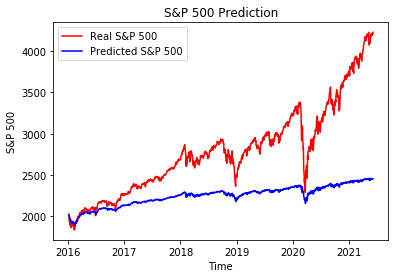

In [56]:
# Visualising the results
dates = pd.to_datetime(df["Date"])
plt.plot(dates.loc[7817:],dataset_test.values, color = 'red', label = 'Real S&P 500')
plt.plot(dates.loc[7817:],predicted_stock_price, color = 'blue', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.savefig("S&P 500 RNN Prediction.png", dpi = 300)
plt.show()